In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Chiller stability

Chiller setpoint temperature was 10°C, the experience time was nearly 1 hour. The stabilization time is approximately 16.67 min. The thermocouple used had an acquisition rate of 10ms.

In [2]:
# Specify the path to your Excel file
file_path = "Book1.xlsx"

# Use pandas to read the Excel file
data1 = pd.read_excel(file_path)

# Now 'data' contains the contents of the Excel file
# You can access specific columns or rows, manipulate data, etc.

# For example, to display the first few rows of the data:
print(data1.head())


   Time  CH1-A-5[°C]
0  0.00         17.1
1  0.01         17.1
2  0.02         17.1
3  0.03         17.1
4  0.04         17.1


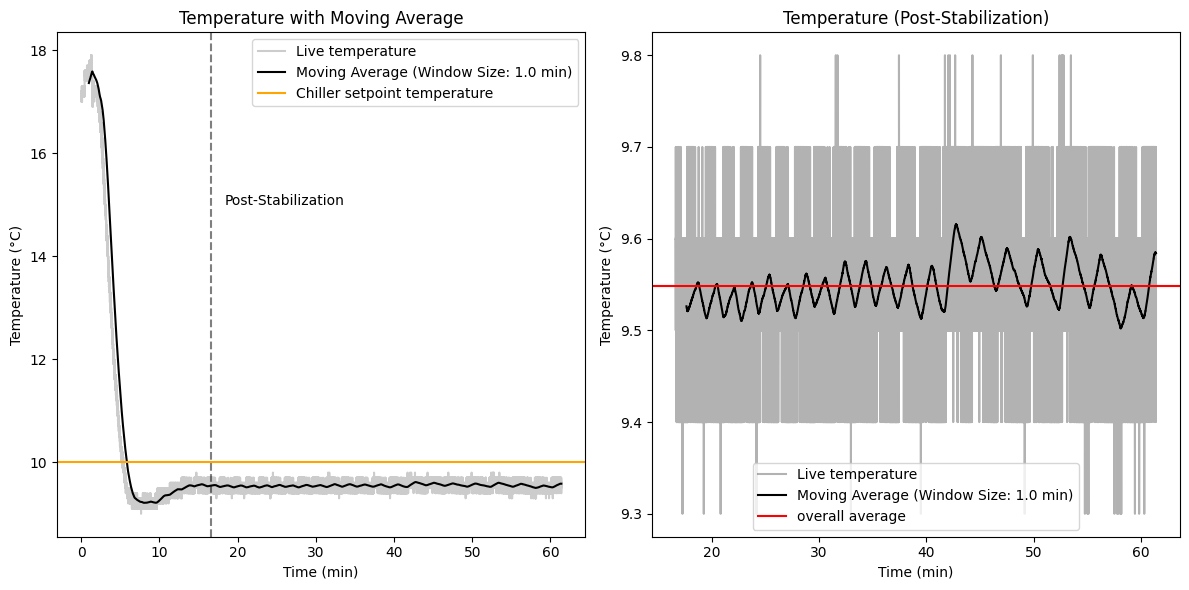

In [3]:
time = np.array(data1.iloc[:, 0].tolist())  # Assuming time is in the first column
temperature = data1.iloc[:, 1].tolist()  # Assuming temperature is in the second column
stabilization_time_threshold = 1000
# Calculate the moving average using pandas
window_size = 60*100  # Adjust the window size as needed
moving_avg = pd.Series(temperature).rolling(window=window_size).mean()

# Find the index where time exceeds the stabilization time threshold
stabilization_index = next((i for i, t in enumerate(time) if t > stabilization_time_threshold), len(time))

# Filter data based on stabilization time
time_stabilization = time[:stabilization_index]
temperature_stabilization = temperature[:stabilization_index]

time_post_stabilization = time[stabilization_index:]
temperature_post_stabilization = temperature[stabilization_index:]

# Calculate moving average for both subsets
moving_avg_stabilization = pd.Series(temperature_stabilization).rolling(window=window_size).mean()
moving_avg_post_stabilization = pd.Series(temperature_post_stabilization).rolling(window=window_size).mean()

# Plot the original temperature data and the moving average
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(time/60, temperature, label='Live temperature', color = 'black', alpha = .2)
ax1.plot(time/60, moving_avg, label=f'Moving Average (Window Size: {window_size/100/60} min)', color='black')
ax1.axhline(10, color = 'orange', label = "Chiller setpoint temperature")
ax1.set_xlabel('Time (min)')
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Temperature with Moving Average')
ax1.axvline(1000/60, linestyle = '--', color = 'black', alpha = .5)
ax1.text(1100/60, 15, 'Post-Stabilization', rotation=0, color='k')

ax1.legend()

ax2.plot(time_post_stabilization/60, temperature_post_stabilization, label='Live temperature',alpha = .3, color = 'black')
ax2.plot(time_post_stabilization/60, moving_avg_post_stabilization, label=f'Moving Average (Window Size: {window_size/100/60} min)', color='black')
ax2.axhline(np.mean(temperature_post_stabilization), linestyle = '-', color = 'red', alpha = 1, label = 'overall average')
ax2.set_xlabel('Time (min)')
ax2.set_ylabel('Temperature (°C)')
ax2.set_title('Temperature (Post-Stabilization)')
ax2.legend()

plt.tight_layout()
plt.show()


# Uncertainty interval of the thermocouples

Three thermocouples were used. The built-in thermocouple of the chiller, and two other thermocouples. The first one is connected to the PC to plot the graph. The second one displays live temperature to be observed manually. Both thermocouples were introduced into the reservoir of the chiller.

In [6]:
import pandas as pd

# Specify the path to your Excel file
file_path = "Book2.xlsx"

# Use pandas to read the Excel file
data2 = pd.read_excel(file_path)

# Now 'data' contains the contents of the Excel file
# You can access specific columns or rows, manipulate data, etc.

# For example, to display the first few rows of the data:
print(data2.head())


   Time  CH1-A-5[°C]
0  0.00         17.9
1  0.01         17.9
2  0.02         17.9
3  0.03         17.8
4  0.04         17.9


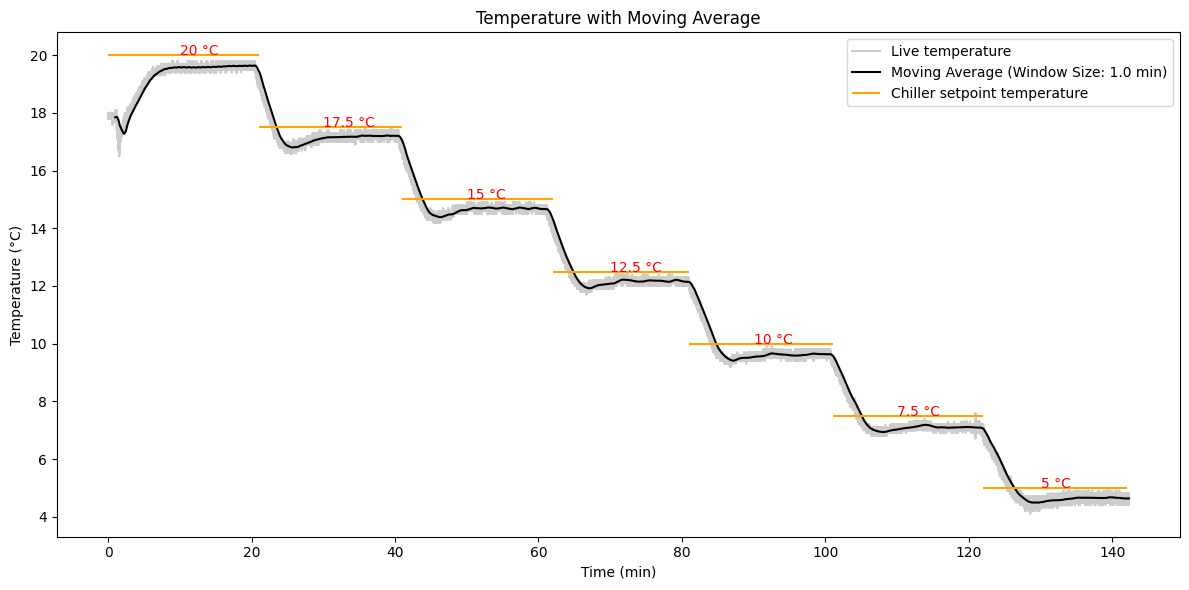

In [7]:
time = np.array(data2.iloc[:, 0].tolist())  # Assuming time is in the first column
temperature = data2.iloc[:, 1].tolist()  # Assuming temperature is in the second column
stabilization_time_threshold = 3000
# Calculate the moving average using pandas
window_size = 60*100  # Adjust the window size as needed
moving_avg = pd.Series(temperature).rolling(window=window_size).mean()

# Find the index where time exceeds the stabilization time threshold
stabilization_index = next((i for i, t in enumerate(time) if t > stabilization_time_threshold), len(time))

# Filter data based on stabilization time
time_stabilization = time[:stabilization_index]
temperature_stabilization = temperature[:stabilization_index]

time_post_stabilization = time[stabilization_index:]
temperature_post_stabilization = temperature[stabilization_index:]

# Calculate moving average for both subsets
moving_avg_stabilization = pd.Series(temperature_stabilization).rolling(window=window_size).mean()
moving_avg_post_stabilization = pd.Series(temperature_post_stabilization).rolling(window=window_size).mean()

# Plot the original temperature data and the moving average
fig, ax1 = plt.subplots(1, figsize=(12, 6))

ax1.plot(time/60, temperature, label='Live temperature', color = 'black', alpha = .2)
ax1.plot(time/60, moving_avg, label=f'Moving Average (Window Size: {window_size/100/60} min)', color='black')
# Setpoints of the chiller
ax1.hlines(20,0,21, color = 'orange', label = 'Chiller setpoint temperature')
ax1.text(10,20,'20 °C', color = 'red')

ax1.hlines(17.5,21,41, color = 'orange')
ax1.text(30,17.5,'17.5 °C', color = 'red')

ax1.hlines(15,41,62, color = 'orange')
ax1.text(50,15,'15 °C', color = 'red')

ax1.hlines(12.5,62,81, color = 'orange')
ax1.text(70,12.5,'12.5 °C', color = 'red')

ax1.hlines(10,81,101, color = 'orange')
ax1.text(90,10,'10 °C', color = 'red')

ax1.hlines(7.5,101,122, color = 'orange')
ax1.text(110,7.5,'7.5 °C', color = 'red')

ax1.hlines(5,122,142, color = 'orange')
ax1.text(130,5,'5 °C', color = 'red')




ax1.set_xlabel('Time (min)')
ax1.set_ylabel('Temperature (°C)')
ax1.set_title('Temperature with Moving Average')


ax1.legend()


plt.tight_layout()
plt.show()


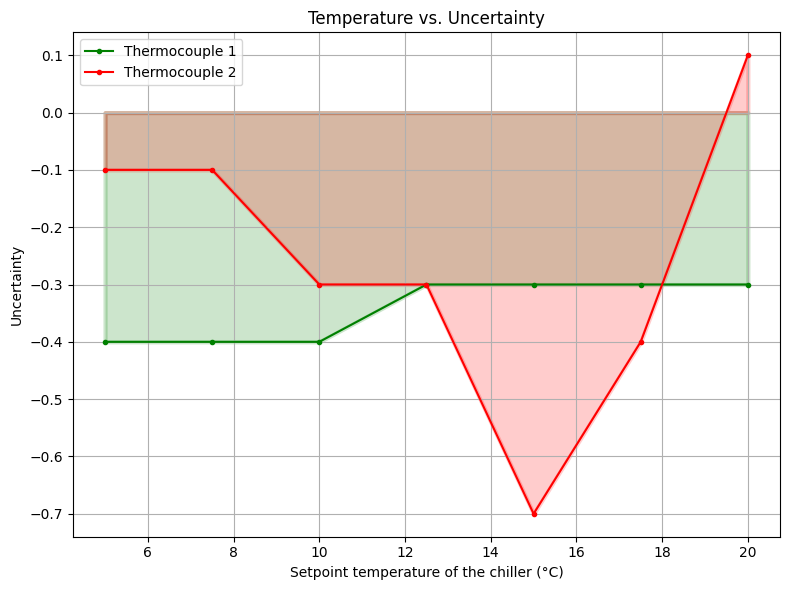

-0.25714285714285673
-0.3428571428571434


In [4]:
temperatures_celsius = np.linspace(5,20,7)  # Celsius
thermocouple_ours = [4.6, 7.1, 9.6, 12.2, 14.7, 17.2, 19.7]
thermocouple_other_lab = [4.9, 7.4, 9.7, 12.2, 14.3, 17.1, 20.1]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(temperatures_celsius, thermocouple_ours-temperatures_celsius, marker='.', linestyle='-', color = 'green', label = 'Thermocouple 1')
plt.plot(temperatures_celsius, thermocouple_other_lab-temperatures_celsius, marker='.', linestyle='-', color = 'red', label = 'Thermocouple 2')
plt.fill_between(temperatures_celsius,0,thermocouple_ours-temperatures_celsius, color = 'green', linewidth = 3, alpha = .2)
plt.fill_between(temperatures_celsius,0,thermocouple_other_lab-temperatures_celsius, color = 'red', linewidth = 3, alpha = .2)

plt.title('Temperature vs. Uncertainty')
plt.xlabel('Setpoint temperature of the chiller (°C)')
plt.ylabel('Uncertainty')
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()
print(np.mean(thermocouple_other_lab-temperatures_celsius))
print(np.mean(thermocouple_ours-temperatures_celsius))